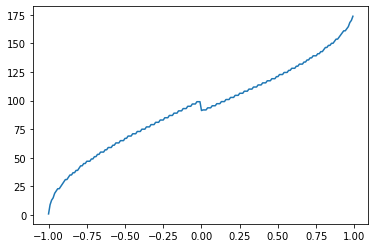

In [20]:
import math
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from itertools import groupby

def day_stats(tau,df):
    # Custom function to solve this sample problem
    # Threshold : 5
    # input: [0,1,3,4,5,5.1,5.1,0,3,9] 
    # output: [5,2]
    # Process: Gets all the lengths of consecutive numbers less than threshold
    # We need this for the Tau vs time p
    # Returns the mean, standard deviation and length of observing period to account for discrepancies in number of observations
    c = df['tau'].le(tau)
    lengths=[]
    for k, g in groupby(c.values):
            g = list(g)
            if k==1:
                lengths.append(len(g))
    return lengths

df2 = pd.DataFrame(columns=["x","tau"])
x = np.arange(0, 20*math.pi, math.pi/100)
df2["tau"] = np.sin(x) # using np.sin

# Setting threshold values
sins=np.arange(-1,1,0.01)
sin_stats=[]

for sin in sins:
    sin_stats.append(day_stats(sin,df2))
    
totals=[np.mean(sin) for sin in sin_stats ]
plt.plot(sins,totals)



In [21]:
def strictly_increasing(L):
    return all(x<y for x, y in zip(L, L[1:]))

def strictly_decreasing(L):
    return all(x>y for x, y in zip(L, L[1:]))

def non_increasing(L):
    return all(x>=y for x, y in zip(L, L[1:]))

def non_decreasing(L):
    return all(x<=y for x, y in zip(L, L[1:]))

def monotonic(L):
    return non_increasing(L) or non_decreasing(L)


In [22]:
print(monotonic(totals[1:99]))
print(monotonic(totals[98:102]), totals[98:102], sins[98:101])
print(monotonic(totals[101:]))
#8.8817842e-16 might cause the floating point error resulting in non monotonous begaviour.
# This might repeat several times during the course of an opacity curve ( all the min and maximas may cause this floating point error)

True
False [99.0, 99.0, 91.27272727272727, 91.81818181818181] [-2.0000000e-02 -1.0000000e-02  8.8817842e-16]
True


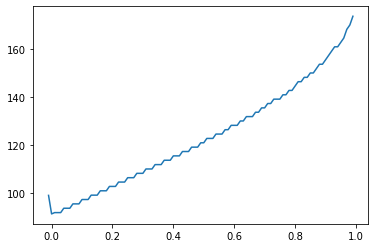

In [6]:
x_vals=[]
y_vals=[]
for sin,total in zip(sins,totals):
    if sin > -0.01:
        x_vals.append(sin)
        y_vals.append(total)
plt.plot(x_vals,y_vals)